In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import contextily as ctx

In [2]:
# Source
estates_dataset_source = "data/Estate_Informationv2.xlsx"
custody_dataset_source = "data/Max Custody Times.csv"
avg_deployment_dataset_source = "data/WEST_AVERAGE_DEPLOYMENT_byDIVISIONandDATE_MINUTES.csv"
incidents_dataset_1_source = "data/Incident2018_1of2.csv"
incidents_dataset_2_source = "data/Incident2018_2of2.csv"

In [3]:
!ls data/

'Divisions no colours.jpg'
 Estate_Informationv2.xlsx
 Estate_Informationv2.zip
'Explanation of Estates Variables v1.docx'
 Incident2018_1of2.csv
 Incident2018_1of2.zip
 Incident2018_2of2.csv
 Incident2018_2of2.zip
'Max Custody Times.csv'
'Max Custody Times.zip'
 WEST_AVERAGE_DEPLOYMENT_byDIVISIONandDATE_MINUTES.csv
 WEST_AVERAGE_DEPLOYMENT_byDIVISIONandDATE_MINUTES.zip


### Estates Dataset

In [3]:
estates_df = pd.read_excel(estates_dataset_source)

In [4]:
estates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 54 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Activity code                                              300 non-null    object 
 1   Property Classification                                    300 non-null    object 
 2   Record Level                                               300 non-null    object 
 3   Division Name                                              299 non-null    object 
 4   Division                                                   300 non-null    object 
 5   Unitary Authority                                          300 non-null    object 
 6   Site Name                                                  216 non-null    object 
 7   Property Name                                              299 non-null    object 
 8   X (Easting

In [5]:
estates_df.head()

,Activity code,Property Classification,Record Level,Division Name,Division,Unitary Authority,Site Name,Property Name,X (Easting),Y (Northing),...,Mountain Rescue (Yes / No),Dogs / Horses (Yes / No),Fleet workshop (Yes / No),Mortuary (Yes / No),Stores (Yes / No),Critical IT infrastructure (Yes / No),Accommodation (Yes / No),Intelligence Support (Yes / No),Number of Parking Spaces,EV Infrastructure
0,P0927,Police Station,Building,Greater Glasgow,G,Glasgow City Council,"Anderston, Glasgow",Anderston Police station,257430,665676,...,No,No,No,No,No,NaN,No,No,30.0,0
1,P0941,Police Station,Building,Greater Glasgow,G,Glasgow City Council,Baillieston,Baillieston Police station New,267968,664010,...,No,No,No,No,No,NaN,No,No,NaN,0
2,P0926,Police Station,Building,Greater Glasgow,G,Glasgow City Council,"Baird Street, Glasgow",Baird Street Police station,260122,666304,...,No,No,No,No,No,NaN,No,Yes,113.0,4
3,P0926-1,Police Station,Part-building,Greater Glasgow,G,Glasgow City Council,"Baird Street, Glasgow",Custody Block,260122,666304,...,No,No,No,No,No,NaN,No,No,NaN,Not on finance list
4,P0926-2,Police Station,Building,Greater Glasgow,G,Glasgow City Council,"Baird Street, Glasgow",Outbuilding,260122,666304,...,No,No,No,No,No,NaN,No,No,NaN,Not on finance list


In [6]:
# There are two types of police stations, 
# either sold or lease relinqushed
# or active police station
estates_df["Property Classification"].unique()

array(['Police Station', 'Sold or Lease Relinquished'], dtype=object)

In [7]:
# There many classifications of police stations
# Local policing are the ones which we want to use
estates_df["Primary Classification (Use)"].unique()

array(['Surplus', 'Local Policing', nan, 'Corporate', 'National Policing',
       'Other Support', 'Land', 'Training', 'Telecommunications Masts',
       'Residential'], dtype=object)

In [8]:
# Local Police station is either a deployment station
# or is not a deployment station
estates_df["Deployment station? Y/N"].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
police_station_filter = estates_df["Property Classification"] == "Police Station"
local_policing_filter = estates_df["Primary Classification (Use)"] == "Local Policing"
deployment_filter = estates_df["Deployment station? Y/N"].isna()
estates_df[police_station_filter & local_policing_filter & deployment_filter]

,Activity code,Property Classification,Record Level,Division Name,Division,Unitary Authority,Site Name,Property Name,X (Easting),Y (Northing),...,Mountain Rescue (Yes / No),Dogs / Horses (Yes / No),Fleet workshop (Yes / No),Mortuary (Yes / No),Stores (Yes / No),Critical IT infrastructure (Yes / No),Accommodation (Yes / No),Intelligence Support (Yes / No),Number of Parking Spaces,EV Infrastructure
77,P1231,Police Station,Building,Argyll & West Dunbartonshire,L,West Dunbartonshire Council,Alexandria,Alexandria Police station-New,239156,680039,...,No,No,No,No,No,NaN,No,No,NaN,0
78,P1208,Police Station,Building,Argyll & West Dunbartonshire,L,Argyll and Bute Council,Appin,Appin Detached Post,193662,746630,...,No,No,No,No,No,NaN,Yes,No,2.0,0
79,P1209,Police Station,Building,Argyll & West Dunbartonshire,L,Argyll and Bute Council,Bowmore,Bowmore Police station,131374,659847,...,No,No,No,No,No,NaN,No,No,3.0,0
80,P1228,Police Station,Building,Argyll & West Dunbartonshire,L,Argyll and Bute Council,Campbeltown,Campbeltown Police station,171712,620913,...,No,No,No,Yes,No,NaN,No,No,41.0,0
81,P1228-1,Police Station,Part-building,Argyll & West Dunbartonshire,L,Argyll and Bute Council,Campbeltown,Custody,171712,620913,...,No,No,No,No,No,NaN,No,No,NaN,Not on finance list
82,P1202,Police Station,Building,Argyll & West Dunbartonshire,L,West Dunbartonshire Council,Clydebank,Clydebank Police station,250108,670853,...,No,No,No,No,No,NaN,No,Yes,200.0,3
83,P1202-1,Police Station,Building,Argyll & West Dunbartonshire,L,West Dunbartonshire Council,Clydebank,Custody Suite,250108,670853,...,No,No,No,No,No,NaN,No,No,NaN,Not on finance list
84,P1213,Police Station,Building,Argyll & West Dunbartonshire,L,Argyll and Bute Council,Dalmally,Dalmally Detached Station,217203,727297,...,No,Yes,No,No,No,NaN,No,No,1.0,0
85,P1201,Police Station,Building,Argyll & West Dunbartonshire,L,West Dunbartonshire Council,Dumbarton,Dumbarton Police station,241120,675631,...,No,No,No,No,No,NaN,No,Yes,79.0,0
86,P1201-1,Police Station,Building,Argyll & West Dunbartonshire,L,West Dunbartonshire Council,Dumbarton,Garages & Outbuildings,241120,675631,...,No,No,No,No,No,NaN,No,No,NaN,Not on finance list


In [10]:
estates_df.index[estates_df['X (Easting)'] == "?"].tolist()

[177, 178]

In [11]:
estates_df.index[estates_df['Y (Northing)'] == "?"].tolist()

[177, 178]

In [12]:
estates_df.iloc[[177, 178]]

,Activity code,Property Classification,Record Level,Division Name,Division,Unitary Authority,Site Name,Property Name,X (Easting),Y (Northing),...,Mountain Rescue (Yes / No),Dogs / Horses (Yes / No),Fleet workshop (Yes / No),Mortuary (Yes / No),Stores (Yes / No),Critical IT infrastructure (Yes / No),Accommodation (Yes / No),Intelligence Support (Yes / No),Number of Parking Spaces,EV Infrastructure
177,P1018-1,Police Station,Building,Ayrshire,U,South Ayrshire Council,Prestwick Airport,Prestwick Airport Ports Coverage Unit,?,?,...,No,No,No,No,No,NaN,No,No,NaN,Not on finance list
178,P1018-2,Police Station,Building,Ayrshire,U,South Ayrshire Council,Prestwick Airport,Prestwick Airport Ports Coverage Unit,?,?,...,No,No,No,No,No,NaN,No,No,NaN,Not on finance list


In [13]:
# These two Police Stations in the dataset have question marks for X and Y Location
# I don't know if this is a simple fix?

In [14]:
# Visualise the locations of the PS
# on a map
loc_filter = estates_df['X (Easting)'] != "?"
ps_df = estates_df[loc_filter][["X (Easting)", "Y (Northing)", "Primary Classification (Use)"]]

<Axes: xlabel='X (Easting)', ylabel='Y (Northing)'>

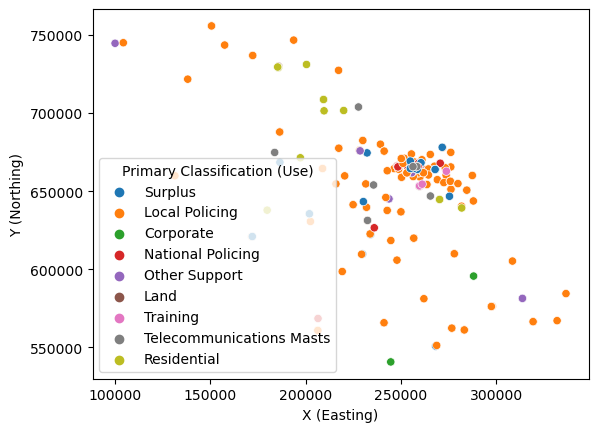

In [15]:
sns.scatterplot(data=ps_df, x="X (Easting)", y="Y (Northing)", hue="Primary Classification (Use)")

In [16]:
estates_df["Division"]

0      G
1      G
2      G
3      G
4      G
      ..
295    U
296    U
297    U
298    U
299    V
Name: Division, Length: 300, dtype: object

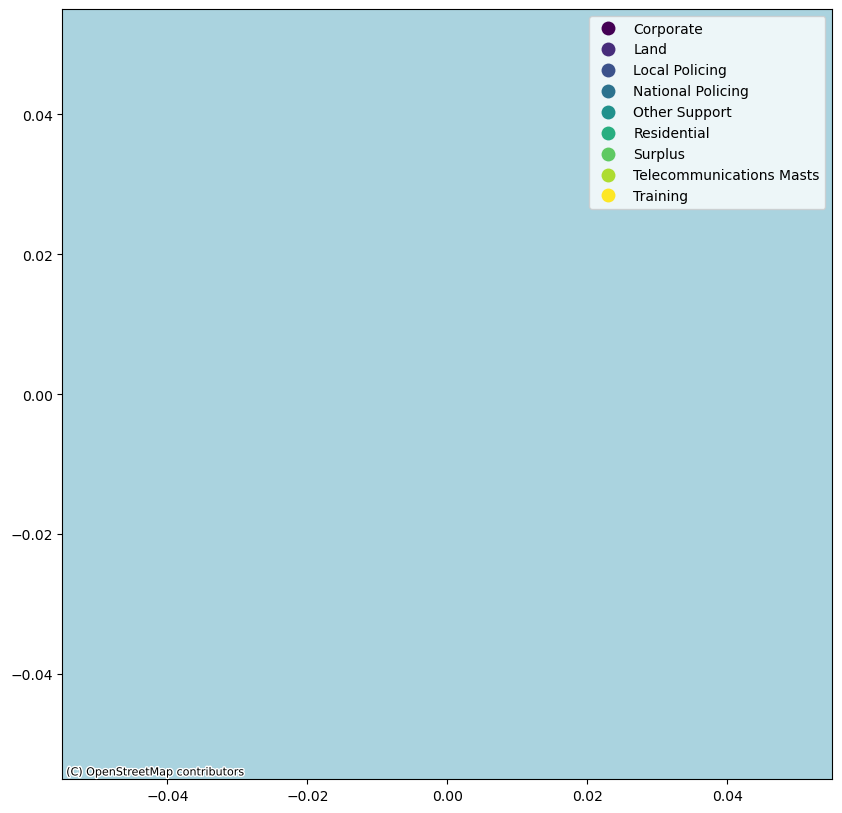

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Sample data with latitude and longitude

# Create a GeoDataFrame using the lat/long coordinates
gdf = gpd.GeoDataFrame(ps_df, geometry=gpd.points_from_xy(ps_df["X (Easting)"], ps_df["Y (Northing)"]))

# Set the coordinate reference system to WGS84 (lat/long)
gdf = gdf.set_crs(epsg=4326)

# Convert to the coordinate reference system used by contextily (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# Plot the points on the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the points, coloring by the 'type' column
gdf.plot(ax=ax, column='Primary Classification (Use)', legend=True, cmap='viridis', markersize=100)

# Add base map from contextily
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=0)

# Show the plot
plt.show()


In [18]:
gdf

,X (Easting),Y (Northing),Primary Classification (Use),geometry
0,257430,665676,Surplus,POINT (inf inf)
1,267968,664010,Local Policing,POINT (inf inf)
2,260122,666304,Local Policing,POINT (inf inf)
3,260122,666304,Local Policing,POINT (inf inf)
4,260122,666304,Local Policing,POINT (inf inf)
...,...,...,...,...
295,201913,635555,Residential,POINT (inf inf)
296,235555,653964,Telecommunications Masts,POINT (inf inf)
297,232397,631290,Telecommunications Masts,POINT (inf inf)
298,201913,635555,Surplus,POINT (inf inf)


In [19]:
 ps_df["Y (Northing)"]

0      665676
1      664010
2      666304
3      666304
4      666304
        ...  
295    635555
296    653964
297    631290
298    635555
299    567425
Name: Y (Northing), Length: 298, dtype: object

In [20]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<insert 

### Max Custody Time

In [21]:
custody_df = pd.read_csv(custody_dataset_source)

In [22]:
custody_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30941 entries, 0 to 30940
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date1                    30941 non-null  object 
 1   CUSTODY_LOCATION_SAN     30941 non-null  int64  
 2   Total_Custodies          30941 non-null  int64  
 3   Max_Travel_Time          30868 non-null  float64
 4   Max_Wait_Time            30889 non-null  float64
 5   Max_Processing_Time      30174 non-null  float64
 6   CUSTODY_LOCATION_SAN.1   30941 non-null  int64  
 7   Custody_Suite_Name_Full  30941 non-null  object 
 8   Division_Name            30941 non-null  object 
 9   DivisionID               30941 non-null  object 
 10  Region                   30941 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 2.6+ MB


In [23]:
custody_df.head()

,Date1,CUSTODY_LOCATION_SAN,Total_Custodies,Max_Travel_Time,Max_Wait_Time,Max_Processing_Time,CUSTODY_LOCATION_SAN.1,Custody_Suite_Name_Full,Division_Name,DivisionID,Region
0,2024-06-25,5060,4,30.0,41.0,8.0,5060,Govan,Greater Glasgow,G,WEST
1,2024-06-25,5078,2,15.0,20.0,NaN,5078,Coatbridge,Lanarkshire,Q,WEST
2,2024-06-25,5056,2,0.0,76.0,NaN,5056,Greenock,Renfrewshire and Inverclyde,K,WEST
3,2024-06-25,5086,2,50.0,40.0,12.0,5086,Clydebank,Argyll and West Dunbartonshire,L,WEST
4,2024-06-25,5053,3,30.0,74.0,NaN,5053,London Road,Greater Glasgow,G,WEST


In [24]:
custody_df.tail()

,Date1,CUSTODY_LOCATION_SAN,Total_Custodies,Max_Travel_Time,Max_Wait_Time,Max_Processing_Time,CUSTODY_LOCATION_SAN.1,Custody_Suite_Name_Full,Division_Name,DivisionID,Region
30936,2018-01-01,5058,1,NaN,NaN,22.0,5058,Rothesay,Argyll and West Dunbartonshire,L,WEST
30937,2018-01-01,5076,3,60.0,4.0,63.0,5076,Stranraer,Dumfries and Galloway,V,WEST
30938,2018-01-01,5082,6,55.0,8.0,19.0,5082,Lanark,Lanarkshire,Q,WEST
30939,2018-01-01,5088,2,NaN,NaN,19.0,5088,Lochgilphead,Argyll and West Dunbartonshire,L,WEST
30940,2018-01-01,5081,7,20.0,5.0,25.0,5081,Hamilton,Lanarkshire,Q,WEST


In [25]:
# Number of unique custody locations
print(custody_df["CUSTODY_LOCATION_SAN"].unique())
print(f"Number of Locations: {custody_df['CUSTODY_LOCATION_SAN'].nunique()}")

[5060 5078 5056 5086 5053 5065 5083 5055 5067 5074 5088 5058 5076 5090
 5069 5085 5059 5084 5092 9052 5087 5061 5063 5073 5070 5071 5062 5075
 5052 5054 5080 5082 5081 5057 5064]
Number of Locations: 35


In [26]:
custody_df.pivot_table(columns="Date1")

/tmp/ipykernel_13901/1007492874.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  custody_df.pivot_table(columns="Date1")


Date1,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2024-06-16,2024-06-17,2024-06-18,2024-06-19,2024-06-20,2024-06-21,2024-06-22,2024-06-23,2024-06-24,2024-06-25
CUSTODY_LOCATION_SAN,5072.4000,5071.294118,5069.812500,5071.800000,5068.529412,5068.071429,5067.705882,5070.357143,5071.357143,5069.250000,...,5072.571429,5071.615385,5069.307692,5072.750000,5070.083333,5071.636364,5068.454545,5071.636364,5070.642857,5068.714286
CUSTODY_LOCATION_SAN.1,5072.4000,5071.294118,5069.812500,5071.800000,5068.529412,5068.071429,5067.705882,5070.357143,5071.357143,5069.250000,...,5072.571429,5071.615385,5069.307692,5072.750000,5070.083333,5071.636364,5068.454545,5071.636364,5070.642857,5068.714286
Max_Processing_Time,38.0500,38.117647,40.933333,32.133333,59.187500,65.285714,58.375000,37.714286,83.642857,34.250000,...,43.153846,42.076923,83.333333,37.700000,21.900000,37.250000,15.750000,28.125000,24.750000,10.000000
Max_Travel_Time,58.0625,34.600000,45.750000,44.538462,42.625000,37.846154,38.000000,44.076923,34.416667,37.866667,...,69.428571,61.923077,57.230769,64.250000,61.333333,96.818182,68.636364,200.545455,61.142857,22.142857
Max_Wait_Time,34.6250,28.266667,23.666667,36.692308,15.312500,19.076923,32.636364,22.692308,24.333333,23.533333,...,47.142857,44.846154,158.384615,129.166667,37.500000,79.636364,49.181818,41.454545,133.714286,38.285714
Total_Custodies,11.5500,7.529412,10.062500,11.800000,10.294118,9.714286,8.235294,9.785714,11.428571,10.062500,...,9.642857,10.923077,11.846154,13.583333,11.333333,14.090909,12.363636,10.181818,10.571429,2.142857


In [27]:
print(f"The number of years in the custody df: {2368/365=}")

The number of years in the custody df: 2368/365=6.487671232876712


In [28]:
# Maximum values of the
# processing stages
print(f'{custody_df["Total_Custodies"].max()=} , {custody_df["Total_Custodies"].min()=}')

print(f'{custody_df["Max_Processing_Time"].max()=} , {custody_df["Max_Processing_Time"].min()=}')

print(f'{custody_df["Max_Travel_Time"].max()=} , {custody_df["Max_Travel_Time"].min()=}')

print(f'{custody_df["Max_Wait_Time"].max()=} , {custody_df["Max_Wait_Time"].min()=}')


custody_df["Total_Custodies"].max()=48 , custody_df["Total_Custodies"].min()=1
custody_df["Max_Processing_Time"].max()=11567.0 , custody_df["Max_Processing_Time"].min()=0.0
custody_df["Max_Travel_Time"].max()=1578258.0 , custody_df["Max_Travel_Time"].min()=0.0
custody_df["Max_Wait_Time"].max()=527097.0 , custody_df["Max_Wait_Time"].min()=0.0


### West Average Deployment Times

In [29]:
deployment_df = pd.read_csv(avg_deployment_dataset_source)

In [30]:
deployment_df

,date_,DivisionID,AVG_Deployment_Time_Mins
0,2024-06-25,G,37
1,2024-06-25,L,28
2,2024-06-25,Q,47
3,2024-06-25,C,22
4,2024-06-25,P,32
...,...,...,...
30733,2018-01-02,G,137
30734,2018-01-02,L,98
30735,2018-01-02,Q,83
30736,2018-01-02,C,161


In [31]:
print(f'No. of days in deployment_df: {deployment_df["date_"].unique().shape}')

No. of days in deployment_df: (2367,)


In [32]:
# Average Deployment Time per division
deployment_df[["DivisionID", "AVG_Deployment_Time_Mins"]].groupby("DivisionID").mean().sort_values("AVG_Deployment_Time_Mins")

,AVG_Deployment_Time_Mins
DivisionID,
V,110.404309
N,127.192802
A,131.968737
C,149.835657
K,153.332488
D,161.711449
U,165.290663
L,167.583016
Q,175.244613


### Incidents Dataset

In [27]:
incidents_1_df = pd.read_csv(incidents_dataset_1_source, encoding='latin-1')
incidents_2_df = pd.read_csv(incidents_dataset_2_source, encoding='latin-1')

In [28]:
incidents_1_df = incidents_1_df.drop(columns="Unnamed: 0")
incidents_2_df = incidents_2_df.drop(columns="Unnamed: 0")

In [29]:
incidents_1_df

,ISR_NO,DATETIME_CREATED,Deployment_Time_Mins,POLICE_WEEK_DAY_CREATED,DivisionID,LATITUDE,LONGITUDE,GIS_LATITUDE,GIS_LONGITUDE,Call_Priority
0,PS-20240701-0376,2024-07-01 04:26:04.000,12.0,Fri,Q,656119.0,270102.0,55.7809,-4.07274,PROMPT
1,PS-20240701-0372,2024-07-01 04:18:38.000,8.0,Fri,G,662967.0,259327.0,55.8394,-4.24795,PROMPT
2,PS-20240701-0369,2024-07-01 04:16:33.000,NaN,Fri,G,665234.0,258843.0,55.8596,-4.25685,PROMPT
3,PS-20240701-0364,2024-07-01 04:08:00.000,NaN,Fri,Q,639807.0,281365.0,55.6373,-3.88620,STANDARD
4,PS-20240701-0357,2024-07-01 03:55:13.000,NaN,Fri,Q,666006.0,275437.0,55.8711,-3.99227,IMMEDIATE
...,...,...,...,...,...,...,...,...,...,...
1377064,PS-20201224-2130,2020-12-24 15:30:03.000,8.0,Mon,Q,657185.0,275510.0,55.7919,-3.98706,IMMEDIATE
1377065,PS-20201224-2125,2020-12-24 15:28:49.000,36.0,Mon,G,658758.0,249976.0,55.7988,-4.39481,PROMPT
1377066,PS-20201224-2122,2020-12-24 15:28:03.000,18.0,Mon,Q,661468.0,271367.0,55.8293,-4.05512,PROMPT
1377067,PS-20201224-2120,2020-12-24 15:27:19.000,72.0,Mon,Q,660777.0,263059.0,55.8208,-4.18730,PROMPT


In [31]:
incidents_df = pd.concat([incidents_1_df, incidents_2_df])

In [32]:
incidents_df.to_csv("Incident2018.csv")

In [33]:
incidents_df

,ISR_NO,DATETIME_CREATED,Deployment_Time_Mins,POLICE_WEEK_DAY_CREATED,DivisionID,LATITUDE,LONGITUDE,GIS_LATITUDE,GIS_LONGITUDE,Call_Priority
0,PS-20240701-0376,2024-07-01 04:26:04.000,12.0,Fri,Q,656119.0,270102.0,55.7809,-4.07274,PROMPT
1,PS-20240701-0372,2024-07-01 04:18:38.000,8.0,Fri,G,662967.0,259327.0,55.8394,-4.24795,PROMPT
2,PS-20240701-0369,2024-07-01 04:16:33.000,NaN,Fri,G,665234.0,258843.0,55.8596,-4.25685,PROMPT
3,PS-20240701-0364,2024-07-01 04:08:00.000,NaN,Fri,Q,639807.0,281365.0,55.6373,-3.88620,STANDARD
4,PS-20240701-0357,2024-07-01 03:55:13.000,NaN,Fri,Q,666006.0,275437.0,55.8711,-3.99227,IMMEDIATE
...,...,...,...,...,...,...,...,...,...,...
1377064,PS-20180101-0015,2018-01-01 00:03:48.000,NaN,Fri,G,669028.0,251550.0,55.8914,-4.37534,IMMEDIATE
1377065,PS-20180101-0011,2018-01-01 00:02:08.000,NaN,Fri,G,665760.0,258341.0,55.8641,-4.26514,IMMEDIATE
1377066,PS-20180101-0010,2018-01-01 00:01:53.000,61.0,Fri,G,665850.0,260293.0,55.8655,-4.23402,IMMEDIATE
1377067,PS-20180101-0007,2018-01-01 00:01:05.000,95.0,Fri,Q,654836.0,264022.0,55.7677,-4.16897,STANDARD


In [8]:
incidents_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377069 entries, 0 to 1377068
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   ï..ISR_NO                1377069 non-null  object 
 1   DATETIME_CREATED         1377069 non-null  object 
 2   Deployment_Time_Mins     629442 non-null   float64
 3   POLICE_WEEK_DAY_CREATED  1377069 non-null  object 
 4   DivisionID               1377069 non-null  object 
 5   LATITUDE                 1377069 non-null  float64
 6   LONGITUDE                1377069 non-null  float64
 7   GIS_LATITUDE             1377069 non-null  float64
 8   GIS_LONGITUDE            1377069 non-null  float64
 9   Call_Priority            1377069 non-null  object 
dtypes: float64(5), object(5)
memory usage: 105.1+ MB


In [10]:
incidents_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377069 entries, 0 to 1377068
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   ï..ISR_NO                1377069 non-null  object 
 1   DATETIME_CREATED         1377069 non-null  object 
 2   Deployment_Time_Mins     575677 non-null   float64
 3   POLICE_WEEK_DAY_CREATED  1377069 non-null  object 
 4   DivisionID               1377069 non-null  object 
 5   LATITUDE                 1377069 non-null  float64
 6   LONGITUDE                1377069 non-null  float64
 7   GIS_LATITUDE             1377069 non-null  float64
 8   GIS_LONGITUDE            1377069 non-null  float64
 9   Call_Priority            1377069 non-null  object 
dtypes: float64(5), object(5)
memory usage: 105.1+ MB


In [33]:
incidents_df = pd.read_csv(incidents_dataset_source)

In [34]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210803 entries, 0 to 1210802
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   ISR_NO                   1210803 non-null  object 
 1   DATETIME_CREATED         1210803 non-null  object 
 2   Deployment_Time_Mins     508941 non-null   float64
 3   POLICE_WEEK_DAY_CREATED  1210803 non-null  object 
 4   DivisionID               1210803 non-null  object 
 5   LATITUDE                 1210803 non-null  float64
 6   LONGITUDE                1210803 non-null  float64
 7   GIS_LATITUDE             1210803 non-null  float64
 8   GIS_LONGITUDE            1210803 non-null  float64
 9   Call_Priority            1210803 non-null  object 
dtypes: float64(5), object(5)
memory usage: 92.4+ MB


In [35]:
incidents_df["DATETIME_CREATED"].max()

'2020-11-13 11:39:14.000'

In [36]:
# Confirm the range of days the dataset covers
print(f"End Date: {pd.to_datetime(incidents_df['DATETIME_CREATED']).dt.date.max()}")
print(f"Start Date: {pd.to_datetime(incidents_df['DATETIME_CREATED']).dt.date.min()}")

End Date: 2020-11-13
Start Date: 2018-01-01


In [37]:
print(f"No. of days in incidents df: {len(pd.to_datetime(incidents_df['DATETIME_CREATED']).dt.date.unique())}")

No. of days in incidents df: 954


## Initial Findings

In [2]:
!ls outcomes

incidents_df_partial_assumptions.csv  random_incidents_map.png
police_stations_map.png


/tmp/ipykernel_2927/1050902865.py:2: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(source)


In [4]:
df.tail()

,urn,latitude,longitude,day,hour,time,priority,deployment_time,station_1,station_2,...,station_54,station_55,station_56,station_57,station_58,resolved,resolving_officer,allocation_time,response_time,resolution_time
1199995,PS-20210530-4057,55.5938,-4.48488,1,21,21,Immediate,0.483333,21.338939,14.699224,...,50.041057,49.911182,43.644879,26.772526,52.035245,True,Officer_station_1_Early_3,7.0,7.711298,8.905929
1199996,PS-20210530-4054,55.8880,-4.37658,1,21,21,Immediate,1.450000,5.554808,6.104429,...,64.021214,63.967208,64.097186,39.900831,72.425052,True,Officer_station_1_Early_13,7.0,7.185160,8.820321
1199997,PS-20210530-4050,55.8648,-4.31727,1,21,21,Prompt,1.450000,3.127630,5.301714,...,61.528933,61.480881,62.698965,37.474785,71.792557,True,Officer_station_10_Early_28,7.0,7.036223,8.522445
1199998,PS-20210530-4047,55.6546,-4.80225,1,21,21,Standard,0.983333,26.503418,18.896640,...,61.975102,61.820343,49.446919,39.478627,52.459367,True,Officer_station_20_Early_4,7.0,7.751055,9.485443
1199999,PS-20210530-4040,55.8211,-4.21916,1,21,21,Prompt,2.233333,3.415292,6.803769,...,57.137406,57.099618,60.243095,33.246479,70.655259,True,Officer_station_10_Early_19,7.0,7.142400,9.518134


In [ ]:
# Which Police Stations had the most number of officers